# Ensemble Methods



## About

The goal of ensemble methods is to combine multiple predictions from different classifiers built on a given learning algorithm.

This helps in improving the robustness and generalizing the features learnt.

There are two popular methods for ensembling: -

* Averaging Methods: - Build several methods and then average their predictions. Combined estimator is better as its variance is reduced.
E.g. Bagging and Random Forests

* Boosting Methods: - Estimators are built sequentially and we try to reduce the error at every step. Building sequentially helps us to reeduce the bias of combined estimator. Here we combine several weak models to produce a powerful ensemble.
E.g. AdaBoost, Gradient Boosting

Refer https://scikit-learn.org/stable/modules/ensemble.html

In [0]:
import numpy as np

## Method 1:- Bagging

Bagging essentially means Bootstrap AGGregation. (Don't know how they made bagging out of this :P )

* In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. 

* These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. 

* In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. 

* As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

* max_samples and max_features control the size of the subsets.
* Bootstrap and Bootstrap_features control whether samples and features can be drawn with or without replacement.

## Method 2: Randomized Trees

* Sklearn.ensemble includes two algorithms for randomized decision trees namely Random Forests and Extra-Trees. 

* Both are designed specifically for trees. 

* We create a diverse set of random classifiers.

* The prediction of these ensembles is given as the averaged prediction of the individual classifers.



### Random Forests

* In Random Forests each tree in the ensemble is built from a sample drawn with 
replacement from training set.

* While splitting each node the best split is found either from all inputs or from random subset of size max_featurs.

* We try to decrease the variance by introducing this randomness. 

* Individual decision trees tend to overfit and exhibit high variance.

* Random Forests introduce randomness to reduce the variance by combining these trees, the errors cancel out.

* Sometimes this can cause a slight increase in the bias but still is preferable as the variance reduces significantly.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X = [[0,0], [1,1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We will discuss about these parameters in a while.

### Extremely Random Trees

* In extremely random trees we increase the randomness a bit more.

* In random forests a random subset of candidate features are used, but instead of looking for the most discriminative thresholds, thresholds are here drawn at random for each candidate.

* This reduces the variance a bit more but increases the bias a little bit.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [0]:
X,Y = make_blobs(n_samples = 100000, n_features = 10, centers=100, random_state=0)

In [0]:
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X,Y, cv = 5)
# Prints the mean score obtained on evalutating
scores.mean()

0.99671

In [0]:
clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
scores = cross_val_score(clf, X, Y, cv = 5)
scores.mean()

0.99992

In [0]:
clf = ExtraTreesClassifier(n_estimators = 10)
scores = cross_val_score(clf, X, Y, cv = 2)
scores.mean()

0.99995

### Parameters

* The main parameters to be adjusted here are n_estimators and max_features.

* n_estimators denotes the maximum number of trees in the forest.

* Larger the better but also it will take much longer to train. 

* Note that beyond a certain number of trees the results will stop improving.

* max_features is the size of the random subsets of features to consider when we are splitting a node.

* Lower number of max_features results in greater reduction of variance, but increase in bias.

* Empirically good values are max_features = None (considering all features) for regression problems.

* Set max_features =  sqrt(n_features) for classification problems.

* Keeping min_number of splits = 2 helps achieve better results. 

* Best parameters should be cross_validated.

* In random forests by default we do the bootsrap sampling. Whereas in the extra trees we use the whole dataset with bootsrap = False

* We may want to check for generalization using out of the bag samples for that we can set oob_score = True

### Parallelization

* We can do construction and computation of predictions of trees parallely.
* For this purpose use n_jobs parameter.
* It is set to -1 to use maximum possible cores available.
* Set it to use k cores for estimation.
* By default it is set to 1.
* This can lead to compuation speedup on large datasets with huge trees.

### Feature Importance

* The relative rank of feature used in decision node in a tree can be used to assess the relative importance of the feature.

* Features used at the top of the tree contribute to much larger extent than the features used at the bottom of the tree.

* They are stored in ` feature_importances_  ` in the fitted model.

* The values are in an array and all sum to 1. Higher the value, more the importance in contributing to the matching feature to the prediction.

## Method 3: Boosting

### AdaBoost

* Sklearn.ensemble contains the popular boosting algorithm known as AdaBoost.

* Core principle of AdaBoost is to fit a sequence of weak learners. (models which are slightly better than random guessing) on repeatedly modified sequence of data.

* The predictions from all of them are combined through a weighted majority vote (or sum) to produce the final prediction.

* The data modifications at each step called as boosting iteration consist of applying weights $ w1, w2, w3, ...., wn $ to each of the trainingt samples.

* Initially all weights are set to 1/N. At each stage sample weights are modified as the classifier learns.

* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted incorrectly.

* As iterations proceed, examples that are difficult to predict recieve ever-incfreasing influence. 

* Each subsequent weak learner is forced to concentrate on examples missed by the previous ones in the sequences.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

In [0]:
iris = load_iris()
X = iris.data
Y = iris.target

In [0]:
clf = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.75)
clf = clf.fit(X,Y)
scores = cross_val_score(clf, X, Y, cv=5, n_jobs = -1)
print(scores.mean())

0.9533333333333334


#### Parameters

* Number of weak learners is given by n_estimators.
* Learning_rate controls the contribution of the weak learners in the final combination.
* By default weak learners are decision stumps.
* Different weak leaners can be passed through ` base_estimator ` parameter.
* Main parameter to tune to obtain good results are `n_estimators ` parameter.

### Gradient Tree Boosting

* Gradient Boosted Decision Trees is a generalization of boosting of arbitary differentiable loss functions.

* GBRT is an accurate and effective of the shelf procedure useful for both regression and classification problems.

* It handles the mix data very well. High predictive power and robust due to variety of loss functions available.

* Disadvantage is that this technique cannot be parallelized. Hence, scalability is less.

#### Classification

` GradientBoostingClassifier ` supports both binary and multi class classification.

In [0]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
X,Y = make_hastie_10_2(n_samples = 12000, random_state = 0)
X_train, Y_train = X[:2000], Y[:2000]
X_test, Y_test = X[2000:], Y[2000:]

In [0]:
clf = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.84, max_depth=5, random_state=31)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8984

##### Parameters

* The number of weak learners is controlled by parameter n_estimators. 
* The size of each tree can be controlled by setting the tree depth via max_depth or setting number of leaf nodes via max_leaf_nodes.
* Learning rate is a hyperparameter between [0,1] that controlls overfitting.
* Do not use this method for multi-class classification, it requires very high computation equal to n_classes * n_estimators.
* For such cases use the ` RandomForestClassifier `

#### Regression

* ` GradientBoostingRegression ` supports a number of loss functions for regression which can be specified via loss.
* Default loss function is least squares ` ls `

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
X,Y = make_friedman1(n_samples = 1200, n_features = 10, noise = 1.0, random_state = 31)
X_train, X_test = X[:200], X[200:]
Y_train, Y_test = Y[:200], Y[200:]

In [0]:
regr = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.3, max_depth = 3, random_state = 0, loss = 'ls')
regr.fit(X_train, Y_train)
mean_squared_error(Y_test, regr.predict(X_test))

4.079040276417188

#### Fitting additional Weak learners

Both `GradientBoostingRegressor` and `GradientBoostingClassifier` support ` warm_start = True ` which allow us to conviniently add more estimators to a fitted model. 

In [0]:
_ = regr.set_params(n_estimators = 200, warm_start = True)
_ = regr.fit(X_train, Y_train)
mean_squared_error(Y_test, regr.predict(X_test))

4.0834700465073315

## Method 4: Voting Classifiers

In majority voting, the predicted class label for a particular sample is the class label that corresponds to majority node of class label predicted by the classifier.

### Hard Voting

In [0]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [0]:
iris = datasets.load_iris()
X,Y = iris.data[:,1:3], iris.target

In [0]:
clf1 = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting = 'hard')

In [72]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


### Soft Voting

In soft voting we return the class label as argmax of the sum of predicted probabilities

* Specific weights are assgined using the ` weights ` parameter.
* When weights are provided the predicted class probabilities are collected, multiplied by the weights and then averaged.
* Final class label is the one with maximum average probability.

* classifier 	|  class 1 	   |    class 2 	|  class 3
* classifier 1 	|   $w1$ * 0.2 |	$w1$ * 0.5  |	$w1$ * 0.3
* classifier 2 	|   $w2$ * 0.6 |	$w2$ * 0.3  |	$w2$ * 0.1
* classifier 3 	|   $w3$ * 0.3 |	$w3$ * 0.4  |	$w3$ * 0.3
* weighted average 	0.37 	   |     0.4 	    |   0.23


Here predicted class is 2. Since it has highest probability

In [0]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [0]:
iris = datasets.load_iris()
# Loading data.....
X = iris.data[:,[0,2]]
Y = iris.target

# Create a bunch of classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors = 2)
clf3 = SVC(gamma = 'scale', kernel = 'rbf', probability=True)
eclf = VotingClassifier(estimators = [('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', n_jobs=-1)


In [0]:
clf1 = clf1.fit(X,Y)
clf2 = clf2.fit(X,Y)
clf3 = clf3.fit(X,Y)
eclf = eclf.fit(X,Y)


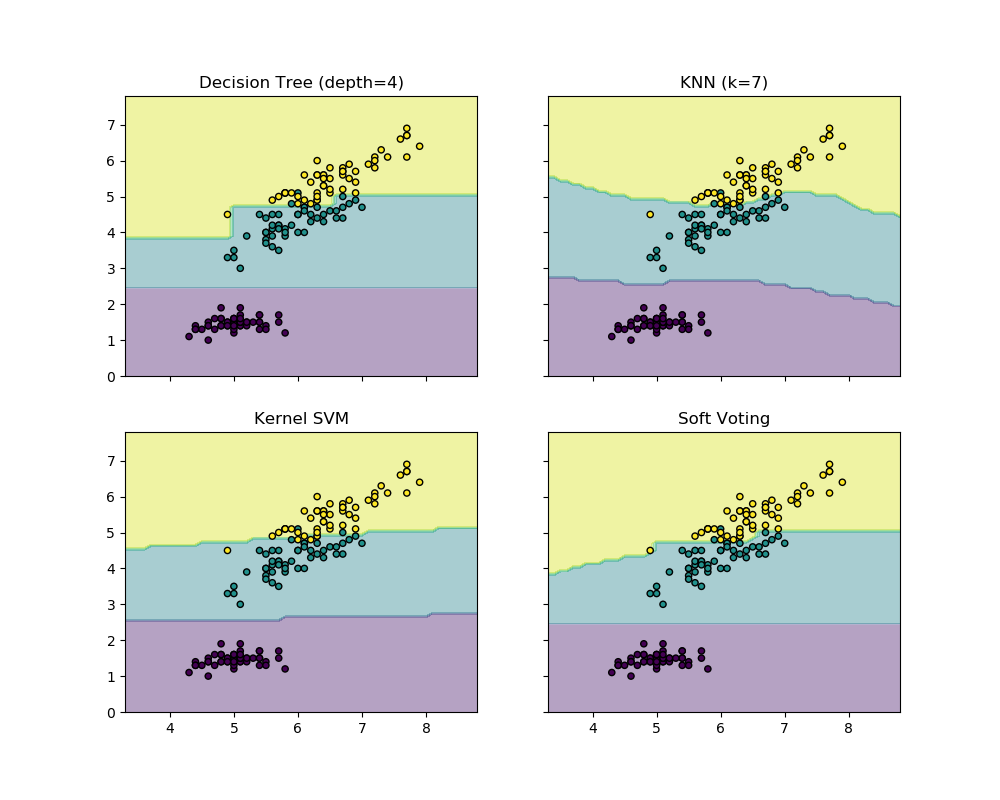

### Using GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
enclf = VotingClassifier(estimators = [('lr', clf1), ('rfc', clf2), ('gnb', clf3)], voting = 'soft')

In [0]:
params = {'lr__C':[1.0,100.0], 'rfc__n_estimators' :  [20,200]}

In [0]:
grid = GridSearchCV(estimator = enclf, param_grid = params, cv = 5)

In [0]:
grid = grid.fit(iris.data, iris.target)

## Method 5: Voting Regressors

* The idea behind Voting Regressor is to combine conceptually different machine learning regressors and return the average predicted values.

* Such a regressor can be powerful and perform equally well in order to balance out each others weaknesses

In [0]:
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [0]:
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [0]:
reg1 = GradientBoostingRegressor(loss = 'ls', n_estimators = 100, random_state=1, learning_rate = 0.1)
reg2 = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth = 5)
reg3 = LinearRegression(n_jobs = -1)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [0]:
ereg = ereg.fit(X,Y)

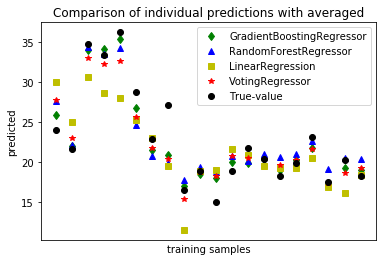

In [101]:
reg1.fit(X, Y)
reg2.fit(X, Y)
reg3.fit(X, Y)
ereg.fit(X, Y)
# Doing for first 20 values
xt = X[:20]
# True Y values
yt = Y[:20]
plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.plot(yt, 'ok', label = 'True-value')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

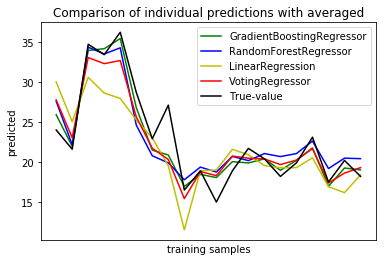

In [102]:
plt.figure()
plt.plot(reg1.predict(xt), 'g', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'y', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r', label='VotingRegressor')
plt.plot(yt, 'k', label = 'True-value')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()